In [2]:
import numpy as np 
import scipy as sp
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt
import scipy.stats as sps
from matplotlib.animation import FuncAnimation
%matplotlib nbagg

# Первый эксперимент

In [3]:
TIME = 3
DELTA_T = 0.005
N_TIME = int(TIME/DELTA_T) + 1
H = 0.1
XRANGE = 15
N_X = int(XRANGE/H) + 1
Z = 1
c = 4
m = 2

Xs = np.linspace(0, XRANGE, N_X)
Xs_with_ghost = np.hstack((np.hstack((np.array([-2*H, -H]), Xs)), np.array([XRANGE+H, XRANGE+2*H])))

In [4]:
def p_start(x):
    return 0

def p_left_boundary(t):
    if t <= 0:
        return 0
    f = 1
    return np.sin(2*np.pi*f * t)**2

def p_right_boundary(t):
    return 0

w_minus = np.empty(shape=(N_TIME, N_X + 2*m))
w_plus = np.empty(shape=(N_TIME, N_X + 2*m))

w_minus[0][m:-m] = -p_start(Xs)/Z 
w_plus[0][m:-m] = p_start(Xs)/Z

#gost-узлы начало

w_minus[0][0], w_minus[0][1] = w_plus[0][2*m] - p_left_boundary(0 - 2*H/c), w_plus[0][1+m] - p_left_boundary(0 - 1*H/c)
w_minus[0][-1], w_minus[0][-2] = w_plus[0][-1-2*m] - p_right_boundary(0 + 2*H/c), w_plus[0][-2-m] - p_right_boundary(0 + 1*H/c)

w_plus[0][0], w_plus[0][1] = w_minus[0][2*m] + p_left_boundary(0 + 2*H/c), w_minus[0][1+m] + p_left_boundary(0 + 1*H/c)
w_plus[0][-1], w_plus[0][-2] =  w_minus[0][-1-2*m] + p_right_boundary(0 - 2*H/c), w_minus[0][-2-m] + p_right_boundary(0 - 1*H/c)

In [5]:
for i in range(1, N_TIME):
    for j in range(m, N_X + m):
        #интерполяция
        interp_minus = sp.interpolate.lagrange(Xs_with_ghost[j-m:j+m+1], w_minus[i-1][j-m:j+m+1])
        interp_plus = sp.interpolate.lagrange(Xs_with_ghost[j-m:j+m+1], w_plus[i-1][j-m:j+m+1])
        poly_minus = np.polynomial.Polynomial(interp_minus.coef[::-1])
        poly_plus = np.polynomial.Polynomial(interp_plus.coef[::-1])
        #заполнение узлов
        w_minus[i][j] = poly_minus(Xs_with_ghost[j] + c*DELTA_T)
        w_plus[i][j] = poly_plus(Xs_with_ghost[j] - c*DELTA_T)
    #заполнение gost узлов
    w_minus[i][0], w_minus[i][1] = w_plus[i][2*m] - p_left_boundary(i*DELTA_T - 2*H/c), \
                                    w_plus[i][1+m] - p_left_boundary(i*DELTA_T - 1*H/c)
    w_minus[i][-1], w_minus[i][-2] = w_plus[i][-1-2*m] - p_right_boundary(i*DELTA_T + 2*H/c),\
                                    w_plus[i][-2-m] - p_right_boundary(i*DELTA_T + 1*H/c)
    w_plus[i][0], w_plus[i][1] = w_minus[i][2*m] + p_left_boundary(i*DELTA_T + 2*H/c),\
                                w_minus[i][1+m] + p_left_boundary(i*DELTA_T + 1*H/c)
    w_plus[i][-1], w_plus[i][-2] =  w_minus[i][-1-2*m] + p_right_boundary(i*DELTA_T - 2*H/c),\
                                w_minus[i][-2-m] + p_right_boundary(i*DELTA_T - 1*H/c)
    

<IPython.core.display.Javascript object>


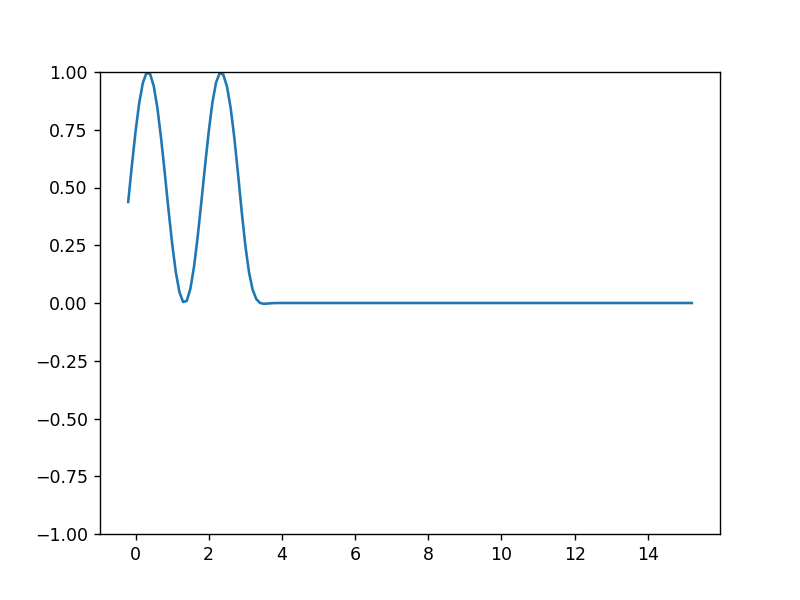

In [6]:
fig = plt.figure()
ax = plt.axes()

def animate(i):
    ax.clear()
    ax.plot(Xs_with_ghost, w_plus[i] - w_minus[i])
    ax.set_ylim(-1, 1)
    
ani = FuncAnimation(fig, animate, frames=400, interval=20, blit=True)

In [193]:
from matplotlib.animation import PillowWriter
writer = PillowWriter(fps=30)
ani.save("start.gif", writer=writer)